<a href="https://colab.research.google.com/github/abdulazizc/PCVK_Matrikulasi/blob/main/pcvk_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Mengubah tingkat kecerahan citra 
 -------------------------------- 
Masukkan nilai kecerahan: 50


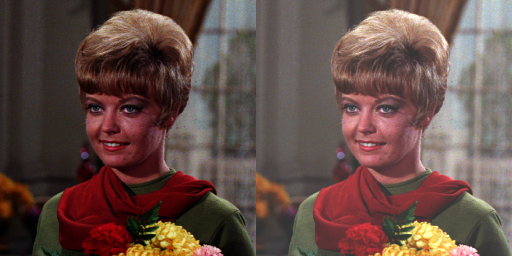

In [ ]:
print(' Mengubah tingkat kecerahan citra ')
print(' -------------------------------- ')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')    

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness image - cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan [-255 - 255]: 60
Masukkan nilai kontras [1.0 - 3.0]: 1.5


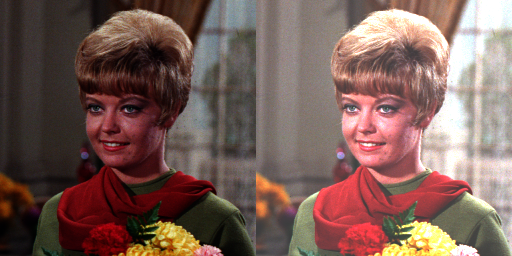

In [ ]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)
final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan transformasi log
--------------------------------
Masukkan nilai kecerahan: 40


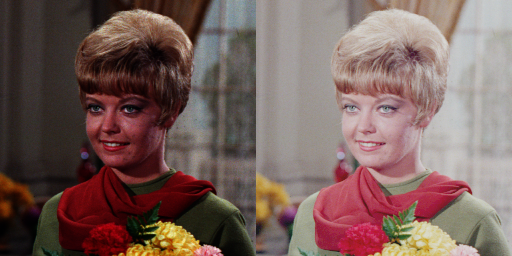

In [ ]:
print('Mengubah tingkat kecerahan citra dengan transformasi log')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * (np.log([1 + original[y,x,c]])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

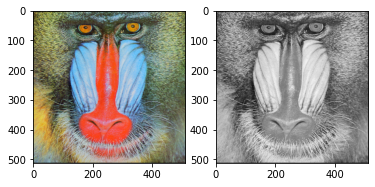

In [ ]:
#Averaging
color_img = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff'), cv.COLOR_BGR2RGB)

R, G, B = color_img[:,:,0], color_img[:,:,1], color_img[:,:,2]

gray_img = R/3 + G/3 + B/3

f, axarr = plt.subplots(1,2) 
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img, cmap='gray')

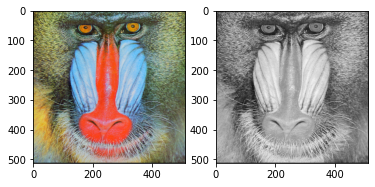

In [ ]:
#Lightness
color_img = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff'), cv.COLOR_BGR2RGB)

R, G, B = color_img[:,:,0], color_img[:,:,1], color_img[:,:,2]
max_channels = np.maximum(np.maximum(R, G), B) 
min_channels = np.minimum(np.minimum(R, G), B) 

gray_img = max_channels/2 + min_channels/2

f, axarr = plt.subplots(1,2) 
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img, cmap='gray')

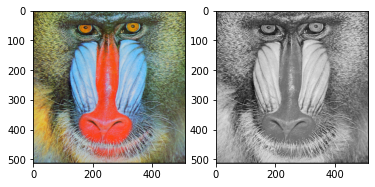

In [ ]:
#Luminance

color_img = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff'), cv.COLOR_BGR2RGB)

R, G, B = color_img[:,:,0], color_img[:,:,1], color_img[:,:,2]

gray_img = (0.2126 * R) + (0.7152 * G) + (0.0722 * B)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img, cmap='gray')

In [3]:
import glob
from math import log10, sqrt

In [8]:
original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

Nilai PSNR adalah 27.538776135022545 (dB)


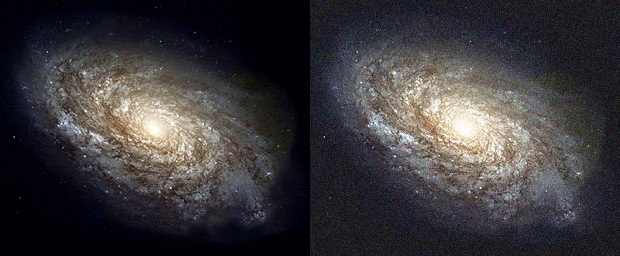

In [9]:
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.52190503391779 (dB)


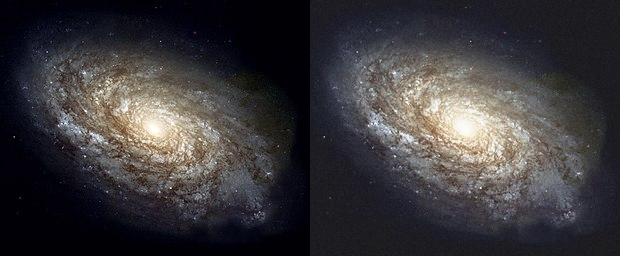

In [10]:
#Citra = 30
dst = cv_img[0]
noise_number = 29
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)